## RSI Calculation and plotting
- https://en.wikipedia.org/wiki/Relative_strength_index

- The relative strength index (RSI) is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.

- The RSI is classified as a momentum oscillator, measuring the velocity and magnitude of price movements. Momentum is the rate of the rise or fall in price. The RSI computes momentum as the ratio of higher closes to lower closes: stocks which have had more or stronger positive changes have a higher RSI than stocks which have had more or stronger negative changes.

- The RSI is most typically used on a 14-day timeframe, measured on a scale from 0 to 100, with high and low levels marked at 70 and 30, respectively. Short or longer timeframes are used for alternately shorter or longer outlooks. High and low levels—80 and 20, or 90 and 10—occur less frequently but indicate stronger momentum.

### Calculation of RSI

-Based on definition found from https://en.wikipedia.org/wiki/Relative_strength_index
If previous price is lower that current price, then set the values: up = close_now - close_previous down = 0

-While if the previous price is higher than current price, then set the values: up = 0 down = close_previus - close_now

-Calculate the Smoothed or Modified Moving Average (SMMA) or the exponential moving average (EMA) or down and up. We chosen (EMA) here.

#### Calculate the relative strength (RS)

Calculation of RSI
From wikipedia.org: https://en.wikipedia.org/wiki/Relative_strength_index

If previous price is lower than current price, then set the values.

up = close_now – close_previous

down = 0

While if the previous price is higher than current price, then set the values

up = 0

down = close_previous – close_now

Calculate the Smoothed or modified moving average (SMMA) or the exponential moving average (EMA) of down and up. To be aligned with the Yahoo! Finance, I have chosen to use the (EMA).

Calculate the relative strength (RS)

RS = EMA(up)/EMA(down)

Then we end with the final calculation of the Relative Strength Index (RSI).

RSI = 100 – (100 / (1 – RSI))
#### Libraries & dependencies
- pandas
- pandas_datareader
- datetime
- matplotlib

In [23]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [24]:
ticker = pdr.get_data_yahoo("GE", dt.datetime(2019,1,1), dt.datetime.now())


In [25]:
delta = ticker['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

In [26]:
ticker['RSI'] = 100 - (100/(1 + rs))


In [27]:
# Skip first 14 days to have real values
ticker = ticker.iloc[14:]

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-22  364.200012  354.230011  362.859985  357.899994   4336500.0   
2019-01-23  362.200012  353.670013  361.910004  358.609985   2924900.0   
2019-01-24  363.179993  356.899994  358.910004  358.269989   2801300.0   
2019-01-25  366.940002  360.329987  362.489990  364.200012   3185600.0   
2019-01-28  363.170013  357.500000  360.649994  362.970001   3128900.0   
...                ...         ...         ...         ...         ...   
2021-07-22  222.250000  218.309998  221.520004  220.869995   9768900.0   
2021-07-23  224.630005  220.940002  222.970001  221.520004   9357000.0   
2021-07-26  226.119995  219.889999  220.000000  225.850006   8928900.0   
2021-07-27  225.699997  220.419998  223.169998  222.270004   8768900.0   
2021-07-28  237.490005  231.330002  234.050003  231.570007  19310700.0   

             Adj Close        RSI  
D

<IPython.core.display.Javascript object>


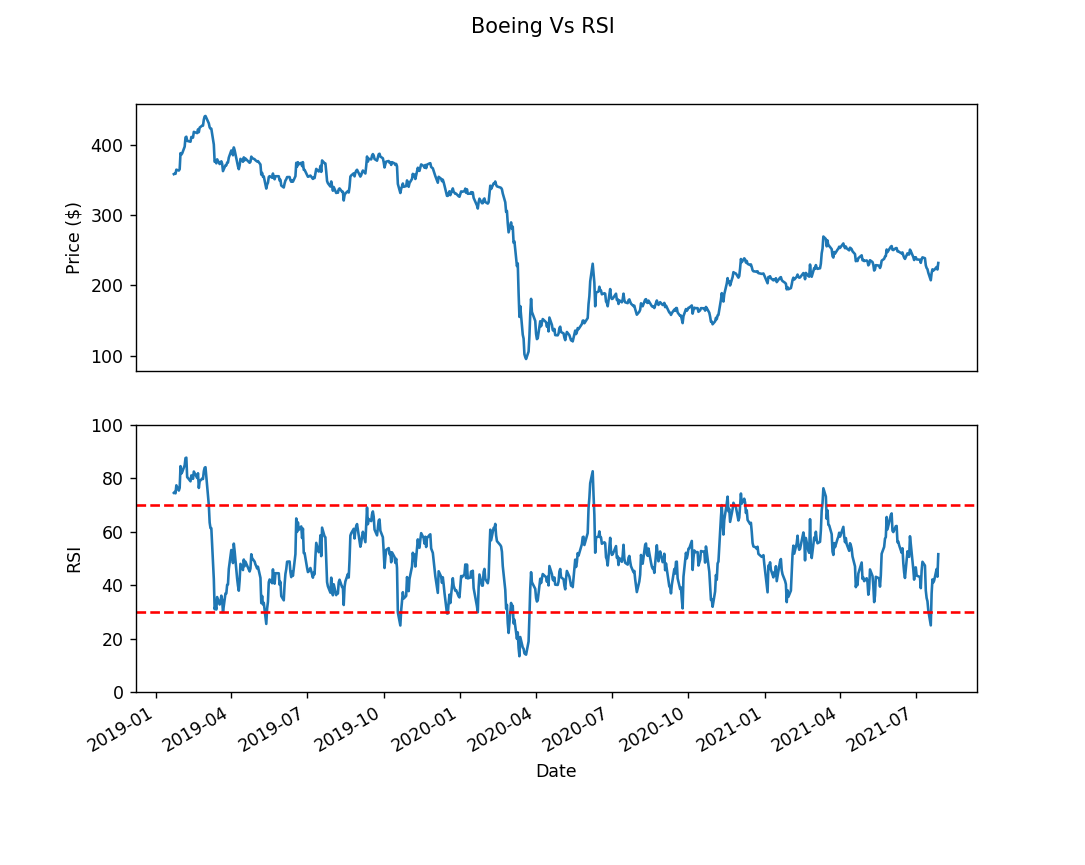

Text(0.5, 0.98, 'Boeing Vs RSI')

In [28]:
print(ticker)
fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('GE Vs RSI')

In [29]:
ticker['Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
ticker['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('RSI')

Text(53.402777777777786, 0.5, 'RSI')

In [30]:
plt.show()